In [ ]:
%pip install matplotlib
%pip install control

## 13.7

### A resposta de um sistema de segunda ordem com dados amostrados a uma entrada degrau

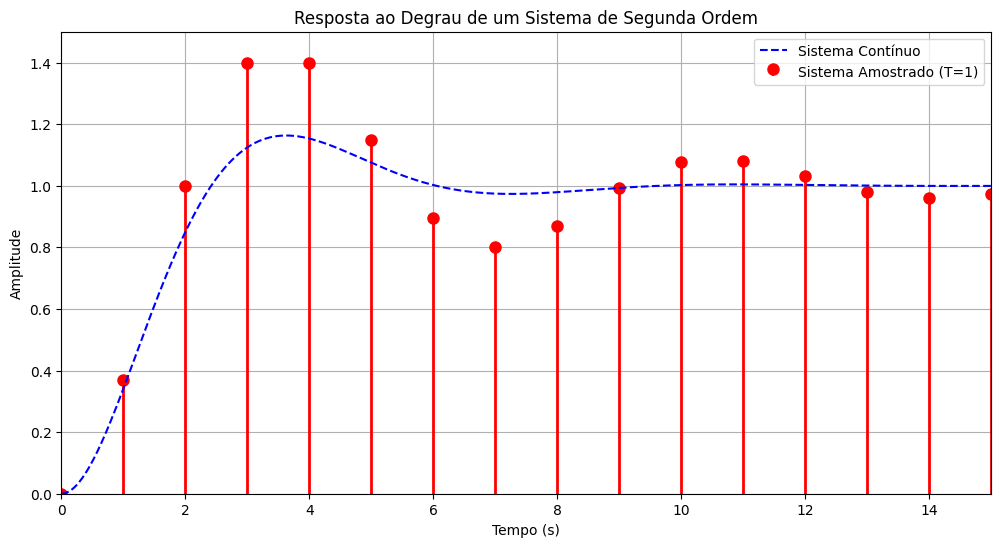

Características do Sistema Amostrado:
- Sobressinal: 40.0%
- Tempo de Acomodação (2%): 15.0 s

Características do Sistema Contínuo:
- Sobressinal: 16.3%
- Tempo de Acomodação (2%): 8.1 s


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

T = 1 

num = [0.3678, 0.3678 * 0.7189] 
den = [1, -1.3678, 0.3678]       

G = ct.tf(num, den, dt=T)  

T_sys = ct.feedback(G, 1)

t_discreto, y_discreto = ct.step_response(T_sys, T=15)

G_cont = ct.tf([1], [1, 1, 0]) 
T_cont = ct.feedback(G_cont, 1)
t_cont = np.linspace(0, 15, 1000)
t_cont, y_cont = ct.step_response(T_cont, t_cont)

plt.figure(figsize=(12, 6))

markerline, stemlines, baseline = plt.stem(
    t_discreto, 
    y_discreto, 
    linefmt='r-', 
    markerfmt='ro', 
    basefmt=' ',
    label='Sistema Amostrado (T=1)'
)

plt.setp(stemlines, linewidth=2)
plt.setp(markerline, markersize=8)

plt.plot(t_cont, y_cont, 'b--', label='Sistema Contínuo')

plt.title('Resposta ao Degrau de um Sistema de Segunda Ordem')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.axis([0, 15, 0, 1.5])
plt.show()

print("Características do Sistema Amostrado:")
print(f"- Sobressinal: {100*(np.max(y_discreto) - 1):.1f}%")
print(f"- Tempo de Acomodação (2%): {t_discreto[np.where(np.abs(y_discreto - 1) > 0.02)[0][-1]]:.1f} s")

print("\nCaracterísticas do Sistema Contínuo:")
print(f"- Sobressinal: {100*(np.max(y_cont) - 1):.1f}%")
print(f"- Tempo de Acomodação (2%): {t_cont[np.where(np.abs(y_cont - 1) > 0.02)[0][-1]]:.1f} s")

## 13.10

### Local da raiz com o compensador dado

c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


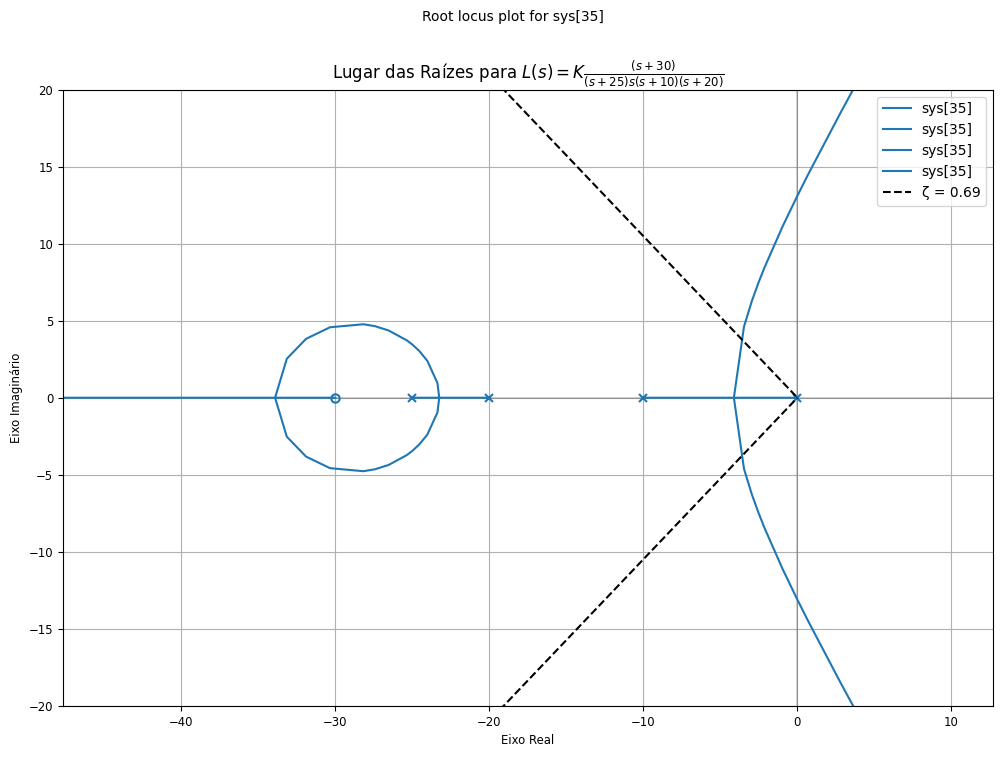

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

a = 30
b = 25
num_gc = [1, a]  
den_gc = [1, b]  
Gc = ct.tf(num_gc, den_gc)

num_gp = [1]
den_gp = [1, 30, 200, 0] 
Gp = ct.tf(num_gp, den_gp)

L = ct.series(Gc, Gp)

plt.figure(figsize=(12, 8))
ct.root_locus(L, grid=False, plot=True)

zeta = 0.69 
theta = np.arccos(zeta)
x = np.linspace(-40, 0, 100)
y = x * np.tan(theta)
plt.plot(x, y, 'k--', label=f'ζ = {zeta}')
plt.plot(x, -y, 'k--')

plt.title('Lugar das Raízes para $L(s) = K\\frac{(s+30)}{(s+25)s(s+10)(s+20)}$')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.axis([-40, 5, -20, 20])
plt.grid(True)
plt.legend()
plt.show()

### Local da raiz para $D(z) = K$

c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


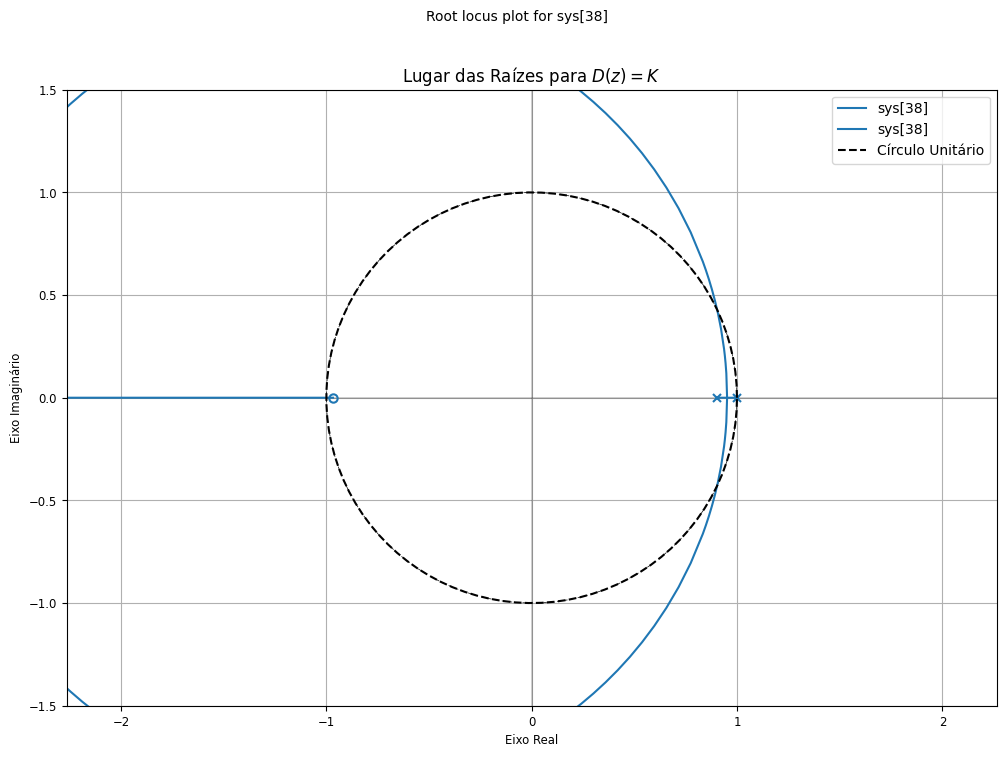

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

num = [0.004837, 0.004679]  
den = [1, -1.9048, 0.9048]
G = ct.tf(num, den, dt=0.1) 

D = ct.tf([1], [1], dt=0.1)  

L = ct.series(D, G)

plt.figure(figsize=(12, 8))
ct.root_locus(L, grid=False, plot=True)

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Círculo Unitário')

plt.title('Lugar das Raízes para $D(z) = K$')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()


### Local da raiz para $D(z) = K$, com as regioes de estabilidade e performance a mostra

c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


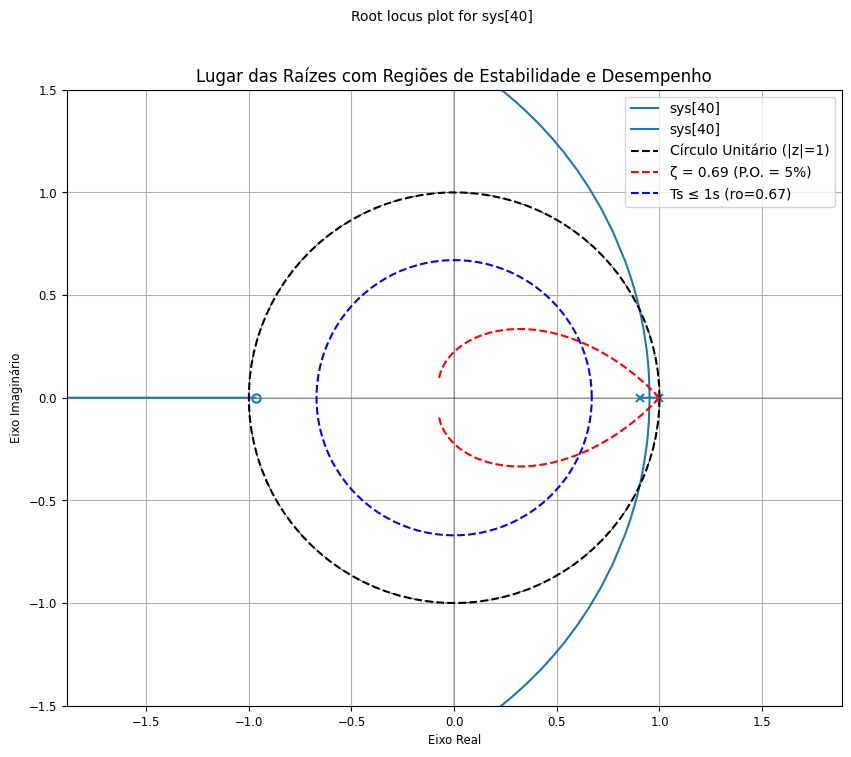

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

T = 0.1  
num = [0.004837, 0.004679] 
den = [1, -1.9048, 0.9048]  
G = ct.tf(num, den, dt=T)  

plt.figure(figsize=(10, 8))
ct.root_locus(G, grid=False, plot=True)

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Círculo Unitário (|z|=1)')

zeta = 0.69
omega = np.linspace(0, np.pi/T, 100)
s = -zeta*omega + 1j*omega*np.sqrt(1 - zeta**2)
z_zeta = np.exp(s*T)
plt.plot(np.real(z_zeta), np.imag(z_zeta), 'r--', label='ζ = 0.69 (P.O. = 5%)')
plt.plot(np.real(z_zeta), -np.imag(z_zeta), 'r--')

Ts = 1
ro = np.exp(-4*T/Ts)
plt.plot(ro*np.cos(theta), ro*np.sin(theta), 'b--', label='Ts ≤ 1s (ro=0.67)')

plt.title('Lugar das Raízes com Regiões de Estabilidade e Desempenho')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()

### A resposta ao degrau e o lugar das raízes compensado de um sistema digital

c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


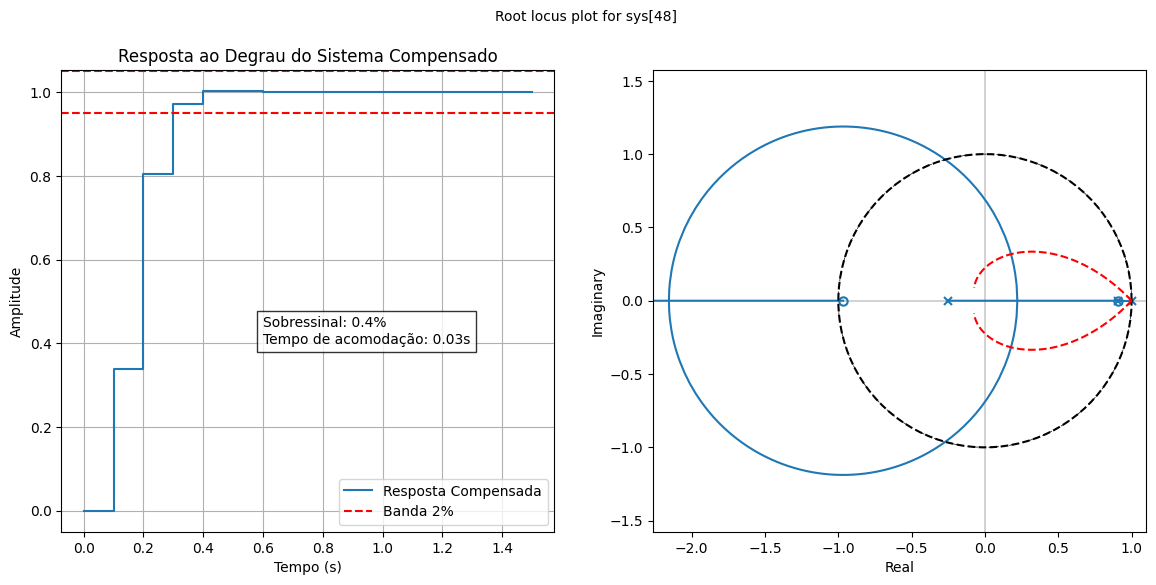

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

T = 0.1 
num = [0.004837, 0.004679] 
den = [1, -1.9048, 0.9048]
G = ct.tf(num, den, dt=T)  

D = ct.tf([70, -70*0.9048], [1, 0.25], dt=T)

sys_cl = ct.feedback(ct.series(D, G), 1)
t_step, y_step = ct.step_response(sys_cl, T=1.5) 

L = ct.series(D, G)  

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.step(t_step, y_step, where='post', label='Resposta Compensada')
plt.title('Resposta ao Degrau do Sistema Compensado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

peak = np.max(y_step)
settling_time = t_step[np.where(np.abs(y_step - 1) > 0.02)[0][-1]] * T
plt.axhline(1.05, color='r', linestyle='--', label='Banda 2%')
plt.axhline(0.95, color='r', linestyle='--')
plt.legend()
plt.text(0.6, 0.4, f'Sobressinal: {100*(peak-1):.1f}%\nTempo de acomodação: {settling_time:.2f}s',
         bbox=dict(facecolor='white', alpha=0.8))

plt.subplot(1, 2, 2)
ct.root_locus(L, grid=False, plot=True)

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Círculo Unitário') 

zeta = 0.69
omega = np.linspace(0, np.pi/T, 100)
s = -zeta*omega + 1j*omega*np.sqrt(1 - zeta**2)
z_zeta = np.exp(s*T)
plt.plot(np.real(z_zeta), np.imag(z_zeta), 'r--', label='ζ = 0.69')
plt.plot(np.real(z_zeta), -np.imag(z_zeta), 'r--')

## 13.11

### A resposta discreta, y(kT), de um sistema de segunda ordem amostrado a um degrau unitário.


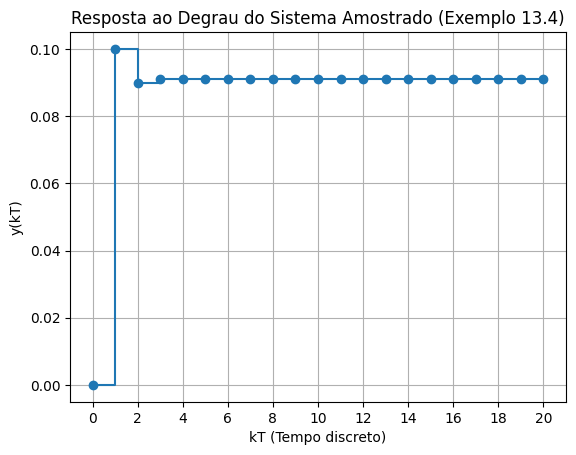

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

num = [1]
den = [1, 10]
sysc = ct.TransferFunction(num, den)

sysd = ct.c2d(sysc, Ts=1, method='zoh')

sys = ct.feedback(sysd, 1)

t = np.arange(0, 21, 1)  
t, y = ct.step_response(sys, t)

plt.step(t, y, where='post', marker='o', linestyle='-')
plt.title('Resposta ao Degrau do Sistema Amostrado (Exemplo 13.4)')
plt.xlabel('kT (Tempo discreto)')
plt.ylabel('y(kT)')
plt.grid(True)
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 0.12, 0.02))
plt.show()

### A resposta contínua y(t) a um degrau unitário para o sistema da Figura 13.16.

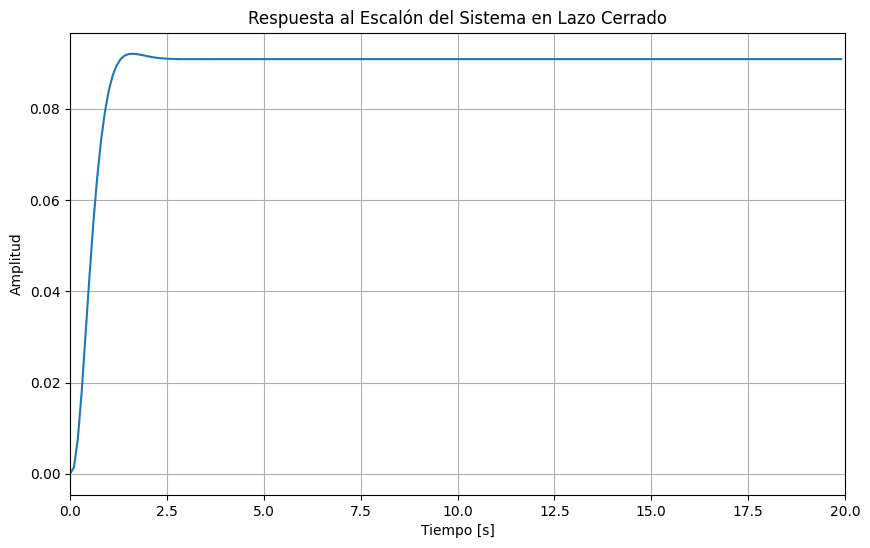

In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

numg = [1]
deng = [1, 10]
sysg = ct.tf(numg, deng)

T = 1
n = 2
num_pade, den_pade = ct.pade(T, n)
sysp = ct.tf(num_pade, den_pade)

sysi = ct.tf([1], [1, 0])

sys1 = (ct.tf([1], [1]) - sysp) * sysi

syso = sys1 * sysg

closed_loop = ct.feedback(syso, 1)

t = np.arange(0, 20, 0.1)

t_step, y_step = ct.step_response(closed_loop, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t_step, y_step)
plt.title('Respuesta al Escalón del Sistema en Lazo Cerrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, 20)
plt.show()

### A função rlocus para sistemas de dados amostrados.


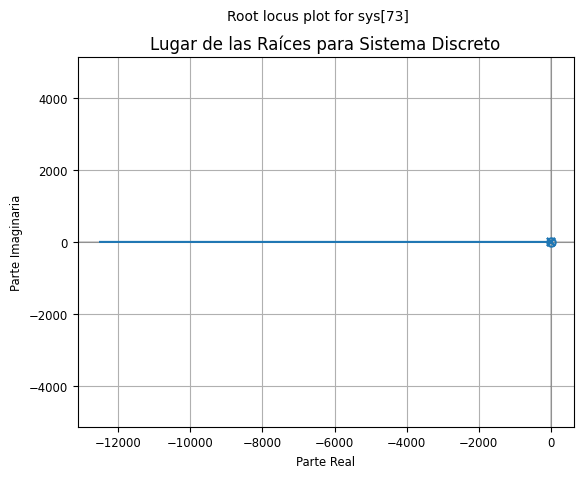

In [ ]:
import control as ct
import matplotlib.pyplot as plt

num = [0.3678, 0.2644]   
den = [1.0, -0.76, -0.24]  

sys = ct.tf(num, den, dt=1)

ct.root_locus(sys, grid=False)

plt.axis('equal')
plt.title('Lugar de las Raíces para Sistema Discreto')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)

# Opcional: Dibujar el círculo unitario para referencia
circle = plt.Circle((0, 0), 1, fill=False, color='red', linestyle='--')
plt.gca().add_patch(circle)

plt.show()